<div class='heading'>
    <div style='float:left;'><h1>CPSC 4300/6300: Applied Data Science</h1></div>
    <img style="float: right; padding-right: 10px; width: 65px" src="https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/images/clemson_paw.png"> </div>


## Homework 2: k-NN Regression

**Clemson University**<br>
**Fall 2021**<br>
**Instructor(s):** Nina Hubig <br>


---



In [1]:
""" RUN THIS CELL TO GET THE RIGHT FORMATTING """
import requests
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/css/cpsc6300.css'
styles = requests.get(css_file).text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed or otherwise limited. 

---

In this homework, we will explore regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York City at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `nyc_taxi.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

In [2]:
import numpy as np
import pandas as pd

from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

<div class="theme"> Question 1 </div>

<div class="exercise"> <b> Question 1.1 </b> Use pandas to load the dataset from the csv file `nyc_taxi.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set data frame as `train_data` and your test set data frame as `test_data`.</div>

In [3]:
# Your code here
df_main = pd.read_csv("data/nyc_taxi.csv")
train_data, test_data = train_test_split(df_main, test_size=0.2, random_state=42)
train_data.head()

,TimeMin,PickupCount
1194,404.0,5.0
911,131.0,17.0
422,85.0,13.0
670,539.0,36.0
931,1266.0,46.0


<div class="exercise"> <b> Question 1.2 </b> Generate a scatter plot of the training data points with clear labels on the x and y axes to demonstrate how the number of taxi pickups is dependent on the time of the day.  Always be sure to title your plot.</div>

Text(0.5, 1.0, 'NYC Taxi Pickups Over Time of Day')

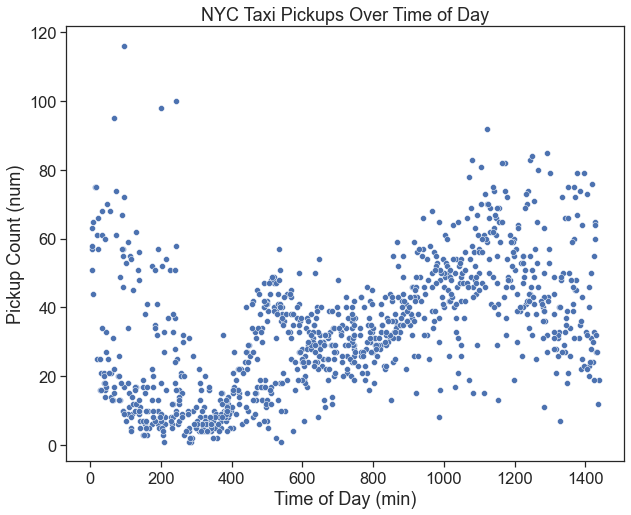

In [4]:
# Your code here
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x="TimeMin", y="PickupCount", data=train_data, ax=ax)
ax.set_xlabel("Time of Day (min)")
ax.set_ylabel("Pickup Count (num)")
ax.set_title("NYC Taxi Pickups Over Time of Day")

<div class="exercise"> <b> Question 1.3 </b> In a few sentences, describe the general pattern of taxi pickups over the course of the day and explain why this is a reasonable result. </div>

A V-shaped pattern can be seen in the graph as pickups start very high, drop very low, and then gradually increase through the day. This is reasonable because one could expect taxi demand to increase through out the day, peaking around midnight to early morning to facilitate bar patrons.

<div class="exercise"> <b> Question 1.4 </b> You should see a <i>hole</i> in the scatter plot when `TimeMin` is 500-550 minutes and `PickupCount` is roughly 20-30 pickups.  Briefly surmise why this is the case. </div>

I believe the hole is there because this time is popular on week days, as more people are taking taxis to get to work, but less popular on the weekends, as less people would be working. Since the data is recorded regardless of the day of the week, this time will have a gap in pickup numbers.

<div class="theme"> Question 2 </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built in functionality from `sklearn` to run k-NN Regression. 

<div class="exercise"> <b> Question 2.1 </b> </div>

Choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

In [5]:
# Your code here
y_train = np.array(train_data.PickupCount)
x_train = np.array(train_data.TimeMin)
x_train = x_train.reshape(x_train.shape[0], 1)

k_list = [1, 10, 75, 250, 500, 750, 1000]
KNNModels = {}
for k in k_list:
    KNNModels[k] = KNeighborsRegressor(n_neighbors=k).fit(x_train, y_train)

<div class="exercise"> <b> Question 2.2 </b> </div>

For each $k$, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` in the training set with a scatter plot of **predictions** for `PickupCount` vs  `TimeMin`.  Do the same for the test set.  You should have one figure with 7 x 2 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. Each subplot should use different color and/or markers to distinguish k-NN regression prediction values from the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  

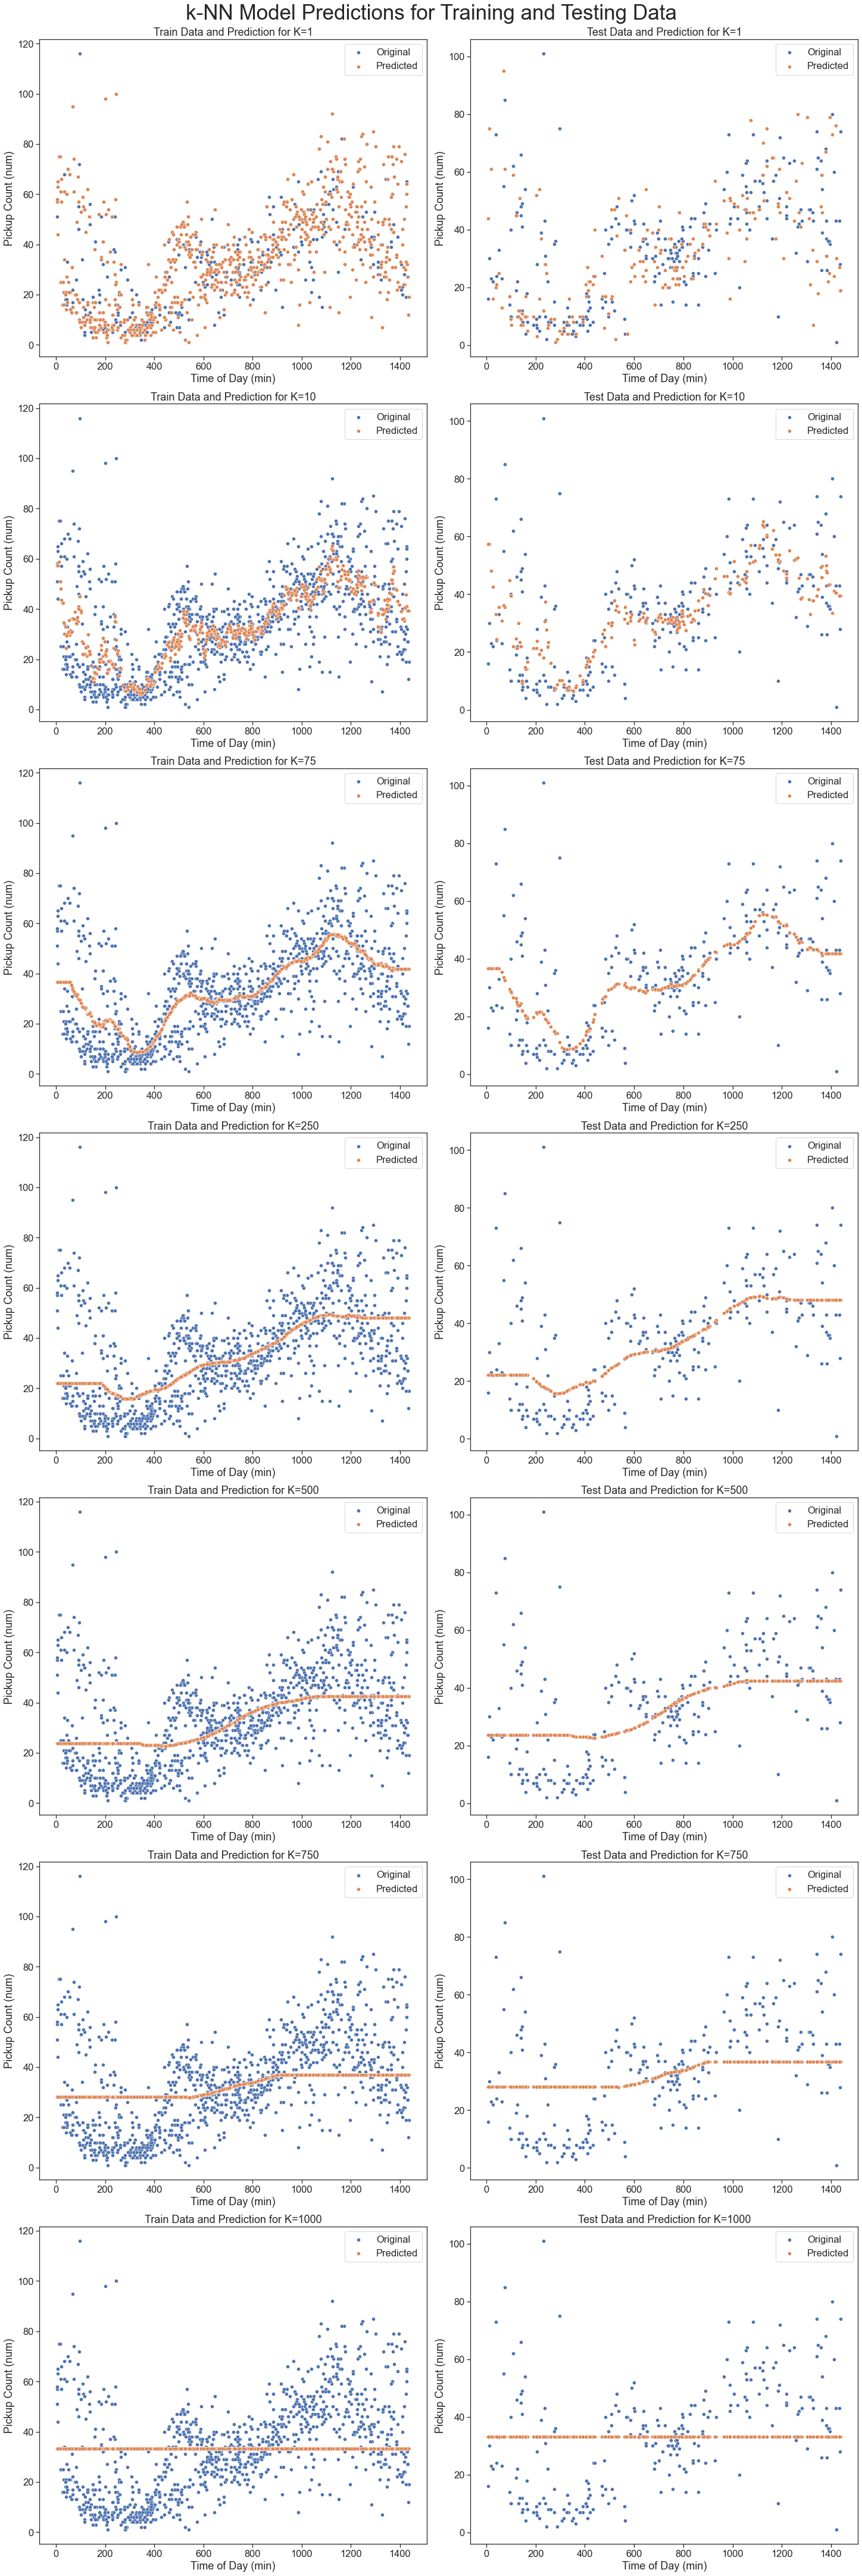

In [6]:
# Your code here
predicted_ys = {"train": [], "test": []}
y_test = np.array(test_data.PickupCount)
x_test = np.array(test_data.TimeMin)
x_test = x_test.reshape(x_test.shape[0], 1)
fig, ax = plt.subplots(7, 2, figsize=(20, 60), constrained_layout=True)
fig.suptitle("k-NN Model Predictions for Training and Testing Data", fontsize=35)

for i in range(7):
    pred_train_y = KNNModels[k_list[i]].predict(x_train)
    predicted_ys["train"].append(pred_train_y)
    pred_test_y = KNNModels[k_list[i]].predict(x_test)
    predicted_ys["test"].append(pred_test_y)

    sns.scatterplot(x="TimeMin", y="PickupCount", data=train_data, label="Original",ax=ax[i][0])
    sns.scatterplot(x=train_data.TimeMin, y=pred_train_y, label="Predicted", ax=ax[i][0])
    ax[i][0].set_title(f"Train Data and Prediction for K={k_list[i]}")
    ax[i][0].legend(loc="best")
    ax[i][0].set_xlabel("Time of Day (min)")
    ax[i][0].set_ylabel("Pickup Count (num)")
    
    sns.scatterplot(x="TimeMin", y="PickupCount", data=test_data, label="Original",ax=ax[i][1])
    sns.scatterplot(x=test_data.TimeMin, y=pred_test_y, label="Predicted", ax=ax[i][1])
    ax[i][1].set_title(f"Test Data and Prediction for K={k_list[i]}")
    ax[i][1].legend(loc="best")
    ax[i][1].set_xlabel("Time of Day (min)")
    ax[i][1].set_ylabel("Pickup Count (num)")

<div class="exercise"> <b> Question 2.3 </b> </div>

Report the $R^2$ score for the fitted models on both the training and test sets for each $k$ (reporting the values in tabular form is encouraged).

In [7]:
# Your code here
r2_dict = {"k": k_list, "trainScore": [], "testScore": []}

for i, k in enumerate(k_list):
    train_score = r2_score(y_train, predicted_ys["train"][i])
    test_score = r2_score(y_test, predicted_ys["test"][i])
    r2_dict["trainScore"].append(train_score)
    r2_dict["testScore"].append(test_score)

r2_df = pd.DataFrame.from_dict(r2_dict)
r2_df.head(7)

,k,trainScore,testScore
0,1,0.668004,-0.149725
1,10,0.510103,0.271394
2,75,0.445612,0.390478
3,250,0.355232,0.340229
4,500,0.290327,0.270321
5,750,0.179434,0.164909
6,1000,0.000000,-0.000384


<div class="exercise"> <b> Question 2.4 </b> </div>

Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ plots on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

Text(0.5, 1.0, 'R^2 Scores of kNN Models for Training and Testing Data')

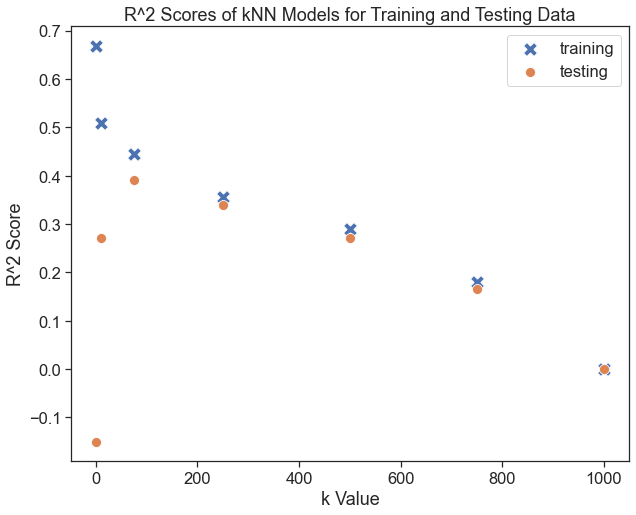

In [8]:
# Your code here
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x="k", y="trainScore", data=r2_df, label="training", marker="X", s=200, ax=ax)
sns.scatterplot(x="k", y="testScore", data=r2_df, label="testing", s=100, ax=ax)
ax.set_xlabel("k Value")
ax.set_ylabel("R^2 Score")
ax.set_title("R^2 Scores of kNN Models for Training and Testing Data")

<div class="exercise"> <b> Question 2.5 </b> </div>

Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. What is the best value of $k$?  How did you come to choose this value?  How do the corresponding training/test set $R^2$ values compare?
6. Use the plots of the predictions (in 2.2) to justify why your choice of the best $k$ makes sense (**Hint**: think Goldilocks).

In [9]:
# 1.) That model has a high bias and will just predict a straight line of the mean.

# 2.) A score of zero indicates that the model is as good as the mean.

# 3.) A negative score indicates that the model is worse than the mean. Yes, the model for k = 1 has a negative score.

# 4.) Yes, the training data scores start high and decline as k increases while the testing data scores start low, rise drastically, then decline with the training scores.

# 5.) I believe the best value for k is 75. I chose this because the average of the two R^2 scores was the highest of any k value. The training data score was slightly higher at
#     0.445612 to the testing data score at 0.390478.

# 6.) The plot for k = 75 shows the first formation of a line that can be drawn by the predictors. This shows that this model is the best as it has the lowest bias and variance.